In [13]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *

In [14]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 4
filling_factor_inv = 3
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

N_phi= 9 flux quanta for N_e= 4 electrons


In [15]:
#initialization (system configurations and parameters)
system = system(N, Nphi,0,L2=True)
#print(system.Q)
#print(system.L2.A)


========Initializing possible states in spherical geometry========
completed in 0.0022008419036865234 seconds
N = 4 electrons
Nphi = 9 flux quanta

========Constructing total angular momentum matrix========
 
completed in 0.008912086486816406 seconds


In [16]:
#trial pseudopotential according to Greiter et al
trial_pp=np.array([1,1,0,0])
trial_pp=np.append(trial_pp, np.zeros((Nphi+1)-len(trial_pp)))
trial_pp = haldane_pseudopotential(system.Q, LLn = 0,custom=trial_pp)

#Coulomb pseudopotentials
pp = haldane_pseudopotential(system.Q, LLn = 0)

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 10.0 %
Working on interaction matrix: 20.0 %
Working on interaction matrix: 30.0 %
Working on interaction matrix: 40.0 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 60.0 %
Working on interaction matrix: 70.0 %
Working on interaction matrix: 80.0 %
Working on interaction matrix: 90.0 %
completed in  1.57686185836792 seconds

========Initializing two-body pseudopotential========
completed in 0.05078887939453125 seconds
pseudopotential: [0.97624285 0.50131389 0.38672786 0.33203907 0.29990626 0.27922307
 0.26543428 0.25633367 0.2507612  0.24810764]

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 10.0 %
Working on interaction matrix: 20.0 %
Working on interaction matrix: 30.0 %
Working on interaction matrix: 40.0 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 6

Text(0.5, 1.0, 'Haldane Pseudopotentials')

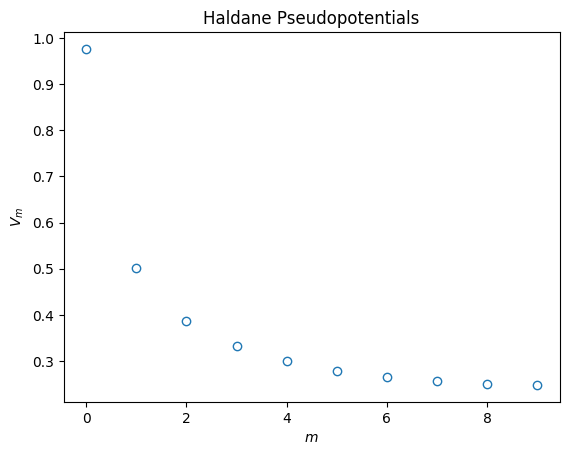

In [17]:
ax=plt.plot(pp.m, pp.V, ls="none", marker="o", mfc="none", label="$n=0$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
plt.xlabel('$m$')
plt.ylabel('$V_m$')
plt.title('Haldane Pseudopotentials')


In [18]:
#create hamiltonian and diagonalize coulomb interaction
hamiltonian = spherical_system(system, pp.pp_matrix)
hamil=hamiltonian.h.A
energies, eigenstates=LA.eigh(hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,hamil)
print('Energy spectrum:', L)

========Constructing Hamiltonian of size 18 x 18 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in 0.024269819259643555 seconds

Energy

Text(0, 0.5, '$E$')

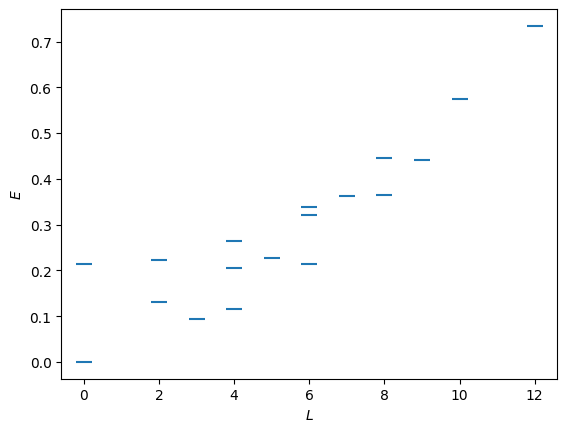

In [19]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(L, ene, ls="none", marker="_", ms="12", mew="1.5")
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

Text(0, 0.5, '$E$')

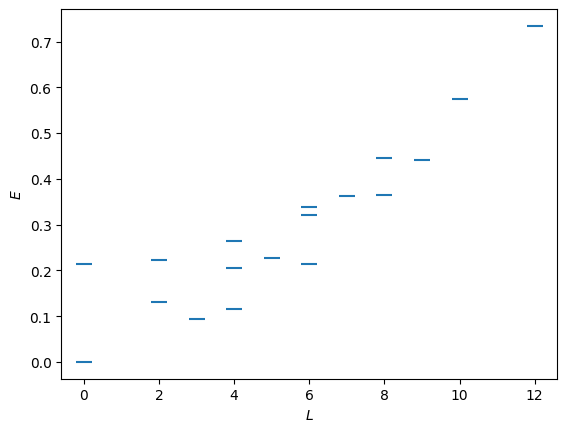

In [20]:
ind=np.argsort(ene) #ensure lowest energy eigenstates are selected

sorted_L=L[ind]
sorted_ene=ene[ind]
if len(ene)>=100: 
    sorted_L=sorted_L[:150]
    sorted_ene=sorted_ene[:150]
    
#plotting energetics
fig, ax = plt.subplots()
ax=plt.plot(sorted_L, sorted_ene, ls="none", marker="_", ms="12", mew="1.5")
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

In [21]:
trial_hamiltonian = spherical_system(system, trial_pp.pp_matrix)
trial_hamil=trial_hamiltonian.h.A
trial_energies, trial_eigenstates=LA.eigh(trial_hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,trial_hamil)
print('Energy spectrum:', L)

========Constructing Hamiltonian of size 18 x 18 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in 0.015755176544189453 seconds

Energy

Text(0, 0.5, '$E$')

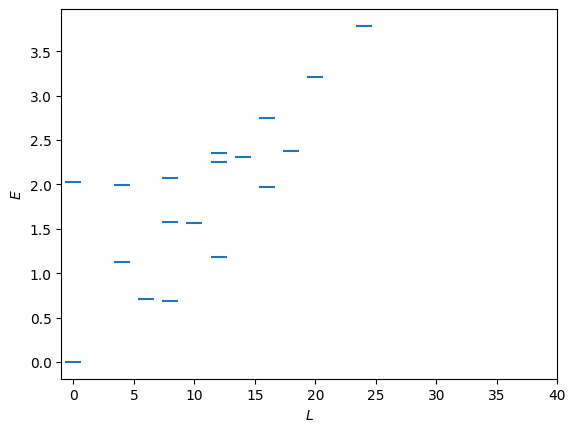

In [22]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(2*L, ene, ls="none", marker="_", ms="12", mew="1.5")
plt.xlim(-1, 40)

#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

In [23]:
overlap_Vectors(np.transpose(trial_eigenstates)[0],np.transpose(eigenstates)[0])

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9980393413833782


0.9980393413833782

In [24]:
ene

array([0.        , 0.68060425, 0.71328671, 1.12006047, 1.18694444,
       1.56923077, 1.57813701, 1.97336478, 1.99462484, 2.02097902,
       2.07272727, 2.24871989, 2.30559441, 2.34965035, 2.37692308,
       2.74901284, 3.20559441, 3.78461538])